**Note:** place file one level up in directory structure so it can run properly.

# Analyzing Baseball Fan Sentiment with Twitter Data #

In [2]:
import glob
import pandas as pd
import numpy as np

# For working with JSON data.
try:
    import json
except ImportError:
    import simplejson as json
    
# For maps.
from mpl_toolkits.basemap import Basemap
import geocoder
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.simplefilter(action = "ignore", category = FutureWarning)

## Intial Exploration (10,000 Tweets Version) ##

In [152]:
for filename in glob.iglob('data/redsox/*.txt'):
     print(filename)

data/redsox/redsox_search_08_06_1000.txt
data/redsox/redsox_search_08_07_1000.txt
data/redsox/redsox_search_08_08_1000.txt
data/redsox/redsox_search_08_09_1000.txt
data/redsox/redsox_search_08_10_1000.txt
data/redsox/redsox_search_08_11_1000.txt
data/redsox/redsox_search_08_12_1000.txt
data/redsox/redsox_search_08_13_1000.txt
data/redsox/redsox_search_08_15_1000.txt
data/redsox/redsox_search_08_16_1000.txt
data/redsox/redsox_stream_08_14_1000.txt


In [165]:
# Read in JSON data and store in pandas DataFrame.
tweets = []
locations = []
for filename in glob.iglob('data/redsox/*.txt'):
    tweets_filename = filename
    tweets_file = open(tweets_filename, "r")
    for line in tweets_file:
        try:
            # Read in each line of file, convert to JSON object. 
            tweet = json.loads(line.strip())
            # Make sure tweet has text content.
            if 'text' in tweet:
                tweets.append(tweet)
                locations.append(tweet['user']['location'])
        except:
            # Skip any non-JSON-formatted data that may have been captured.
            continue

In [166]:
df_redsox_all = pd.DataFrame(tweets)

In [167]:
df_redsox_all['location'] = pd.Series(locations)

In [168]:
df_redsox_all.shape

(11000, 33)

In [242]:
df_redsox_all.head(3)

contributors coordinates                      created_at  \
0         None        None  Sat Aug 06 23:59:36 +0000 2016   
1         None        None  Sat Aug 06 23:59:34 +0000 2016   
2         None        None  Sat Aug 06 23:59:27 +0000 2016   

                                            entities  \
0  {'hashtags': [{'indices': [7, 14], 'text': 'Re...   
1  {'hashtags': [{'indices': [0, 4], 'text': 'MLB...   
2  {'hashtags': [{'indices': [98, 112], 'text': '...   

                                   extended_entities  favorite_count  \
0  {'media': [{'display_url': 'pic.twitter.com/0w...               0   
1  {'media': [{'display_url': 'pic.twitter.com/vb...               0   
2  {'media': [{'id': 762066207595823105, 'expande...               0   

  favorited filter_level   geo                  id            ...              \
0     False          NaN  None  762075686232207360            ...               
1     False          NaN  None  762075674534223872            ...               
2     False          NaN  None  762075645136568320            ...               

  quoted_status_id_str retweet_count  retweeted  \
0                  NaN             0      False   
1                  NaN             0      False   
2                  NaN            41      False   

                                    retweeted_status  \
0                                                NaN   
1                                                NaN   
2  {'id': 762066225287434240, 'in_reply_to_user_i...   

                                              source  \
0  <a href="http://dlvr.it" rel="nofollow">dlvr.i...   
1  <a href="http://dlvr.it" rel="nofollow">dlvr.i...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text timestamp_ms truncated  \
0  Boston #RedSox Ladies #Shirt. Gray, Red, and B...          NaN     False   
1  #MLB #BaseBall: New and rare, Boston #RedSox T...          NaN     False   
2  RT @_AlexanderJean_: Honored to sing The Natio...          NaN     False   

                                                user  \
0  {'id': 711894430303789056, 'profile_image_url_...   
1  {'id': 711894430303789056, 'profile_image_url_...   
2  {'id': 3419203263, 'profile_image_url_https': ...   

                    location  
0                             
1                             
2  7/21/15 | 3/8/16 | 7/7/16  

[3 rows x 33 columns]

In [279]:
huge_rt = df_redsox[df_redsox['retweet_count'] >= 3000]

In [283]:
huge_rt

text  \
120   RT @RomanAtwood: No Vlog today everyone. Worki...   
763   RT @RomanAtwood: Think about it. https://t.co/...   
1514  RT @RomanAtwood: The cop car is GONE!! Tomorro...   
2082  RT @RedSox: .@DAVIDprice24 is lookin' good! üî•\...   
4405  RT @RomanAtwood: Here we go!! The start of ano...   
7271  RT @seanswaby: Olympians: They‚Äôre just like th...   
9654  RT @RomanAtwood: Can't believe how far we have...   

                          created_at        location  retweet_count  \
120   Sat Aug 06 23:30:34 +0000 2016  Louisiana, USA          44713   
763   Sat Aug 06 22:34:01 +0000 2016  Louisiana, USA          59880   
1514  Sun Aug 07 23:32:10 +0000 2016  Louisiana, USA          48859   
2082  Mon Aug 08 23:37:15 +0000 2016                           3632   
4405  Wed Aug 10 23:28:13 +0000 2016  Louisiana, USA          84162   
7271  Sat Aug 13 23:42:08 +0000 2016                         151952   
9654  Tue Aug 16 22:59:59 +0000 2016  Louisiana, USA          37587   

       latitude  longitude  
120   30.984298 -91.962333  
763   30.984298 -91.962333  
1514  30.984298 -91.962333  
2082        NaN        NaN  
4405        NaN        NaN  
7271        NaN        NaN  
9654        NaN        NaN

In [285]:
df_redsox = df_redsox_all[['text', 'created_at', 'location', 'retweet_count', 'favorite_count']]

In [286]:
df_redsox.shape

(11000, 5)

In [287]:
df_redsox.head(10)

text  \
0  Boston #RedSox Ladies #Shirt. Gray, Red, and B...   
1  #MLB #BaseBall: New and rare, Boston #RedSox T...   
2  RT @_AlexanderJean_: Honored to sing The Natio...   
3  May not have got the W but I got to see @david...   
4                         @aidancab @RedSox foreal üò¥   
5  RT @RedSox: RECAP:#RedSox fall to the Dodgers ...   
6  RT @RedSox: It's about that time! üá∫üá∏ https://t...   
7  RT @_AlexanderJean_: Honored to sing The Natio...   
8  Tune in for game 2 of the east division semi f...   
9  RT @RedSox: RECAP:#RedSox fall to the Dodgers ...   

                       created_at                     location  retweet_count  \
0  Sat Aug 06 23:59:36 +0000 2016                                           0   
1  Sat Aug 06 23:59:34 +0000 2016                                           0   
2  Sat Aug 06 23:59:27 +0000 2016    7/21/15 | 3/8/16 | 7/7/16             41   
3  Sat Aug 06 23:59:19 +0000 2016              Los Angeles, CA              0   
4  Sat Aug 06 23:59:19 +0000 2016                           MA              0   
5  Sat Aug 06 23:59:02 +0000 2016                                          29   
6  Sat Aug 06 23:58:50 +0000 2016             Redondo Beach Ca             75   
7  Sat Aug 06 23:58:06 +0000 2016                  Batavia, NY             41   
8  Sat Aug 06 23:58:04 +0000 2016                  Orleans, MA              1   
9  Sat Aug 06 23:58:01 +0000 2016  La Vega, Dominican Republic             29   

   favorite_count  
0               0  
1               0  
2               0  
3               2  
4               1  
5               0  
6               0  
7               0  
8               0  
9               0

In [174]:
# Takes a very long time to run. Other libraries quicker?
lats = []
longs = []
for location in df_redsox['location']:
    g = geocoder.google(location)
    if g.latlng != []:
        lats.append(g.latlng[0])
        longs.append(g.latlng[1])
    else:
        lats.append(np.nan)
        longs.append(np.nan)

In [176]:
print(len(lats))
print(len(longs))

11000
11000


In [288]:
df_redsox['latitude'] = pd.Series(lats)
df_redsox['longitude'] = pd.Series(longs)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [304]:
df_redsox['created_at'].dtypes

dtype('O')

In [305]:
df_redsox['created_at'].head()

0    Sat Aug 06 23:59:36 +0000 2016
1    Sat Aug 06 23:59:34 +0000 2016
2    Sat Aug 06 23:59:27 +0000 2016
3    Sat Aug 06 23:59:19 +0000 2016
4    Sat Aug 06 23:59:19 +0000 2016
Name: created_at, dtype: object

In [354]:
# First, parse to datetime, then get YYYY-MM-DD format.
df_redsox['time'] = pd.to_datetime(df_redsox['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_redsox['time'] = pd.to_datetime(df_redsox['time'].dt.date, format='%Y-%m-%d')
#date = datetime.strptime('Thu Apr 23 13:38:19 +0000 2009','%a %b %d %H:%M:%S +0000 %Y')
#date = datetime.strftime(date, '%Y %d %m')
#type(date)
#df_redsox['time'].dtypes

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [355]:
df_redsox.head(10)

text  \
0  Boston #RedSox Ladies #Shirt. Gray, Red, and B...   
1  #MLB #BaseBall: New and rare, Boston #RedSox T...   
2  RT @_AlexanderJean_: Honored to sing The Natio...   
3  May not have got the W but I got to see @david...   
4                         @aidancab @RedSox foreal üò¥   
5  RT @RedSox: RECAP:#RedSox fall to the Dodgers ...   
6  RT @RedSox: It's about that time! üá∫üá∏ https://t...   
7  RT @_AlexanderJean_: Honored to sing The Natio...   
8  Tune in for game 2 of the east division semi f...   
9  RT @RedSox: RECAP:#RedSox fall to the Dodgers ...   

                       created_at                     location  retweet_count  \
0  Sat Aug 06 23:59:36 +0000 2016                                           0   
1  Sat Aug 06 23:59:34 +0000 2016                                           0   
2  Sat Aug 06 23:59:27 +0000 2016    7/21/15 | 3/8/16 | 7/7/16             41   
3  Sat Aug 06 23:59:19 +0000 2016              Los Angeles, CA              0   
4  Sat Aug 06 23:59:19 +0000 2016                           MA              0   
5  Sat Aug 06 23:59:02 +0000 2016                                          29   
6  Sat Aug 06 23:58:50 +0000 2016             Redondo Beach Ca             75   
7  Sat Aug 06 23:58:06 +0000 2016                  Batavia, NY             41   
8  Sat Aug 06 23:58:04 +0000 2016                  Orleans, MA              1   
9  Sat Aug 06 23:58:01 +0000 2016  La Vega, Dominican Republic             29   

   favorite_count   latitude   longitude       time  
0               0        NaN         NaN 2016-08-06  
1               0        NaN         NaN 2016-08-06  
2               0  38.378012   38.269627 2016-08-06  
3               2  34.052234 -118.243685 2016-08-06  
4               1  42.407211  -71.382437 2016-08-06  
5               0        NaN         NaN 2016-08-06  
6               0  33.849182 -118.388408 2016-08-06  
7               0  42.998116  -78.187517 2016-08-06  
8               0  41.789835  -69.989732 2016-08-06  
9               0  19.215261  -70.520544 2016-08-06

In [413]:
retweet_count = df_redsox['retweet_count'].tolist()
retweet_count = [count + 100 for count in retweet_count]

In [405]:
favorite_count = df_redsox['favorite_count'].tolist()
favorite_count = [count + 100 for count in favorite_count]

In [406]:
dates = [int(time.timestamp()) for time in df_redsox['time']]

In [4]:
#fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(111)
#ax.set_title("Scaled Up Earth With Coastlines")
#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
#x, y = m(df_redsox['longitude'].tolist(), df_redsox['latitude'].tolist())
#m.scatter(x, y, s=retweet_count, alpha=0.2, facecolors='lightblue', edgecolors='none', zorder=10)
#m.scatter(x, y, s=600, alpha=0.1, facecolors='none', edgecolors='r')
#m.drawcoastlines()
#m.fillcontinents(color='#f2f2f2',lake_color='white')
#m.drawstates()
#plt.show()

In [209]:
#from matplotlib.colors import rgb2hex
#from matplotlib.colors import Normalize, PowerNorm
#from matplotlib.patches import Polygon

In [367]:
from matplotlib.colors import ListedColormap

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(flatui)
# construct cmap
my_cmap = ListedColormap(flatui)

#N = 500
#data1 = np.random.randn(N)
#data2 = np.random.randn(N)
#colors = np.linspace(0,1,N)


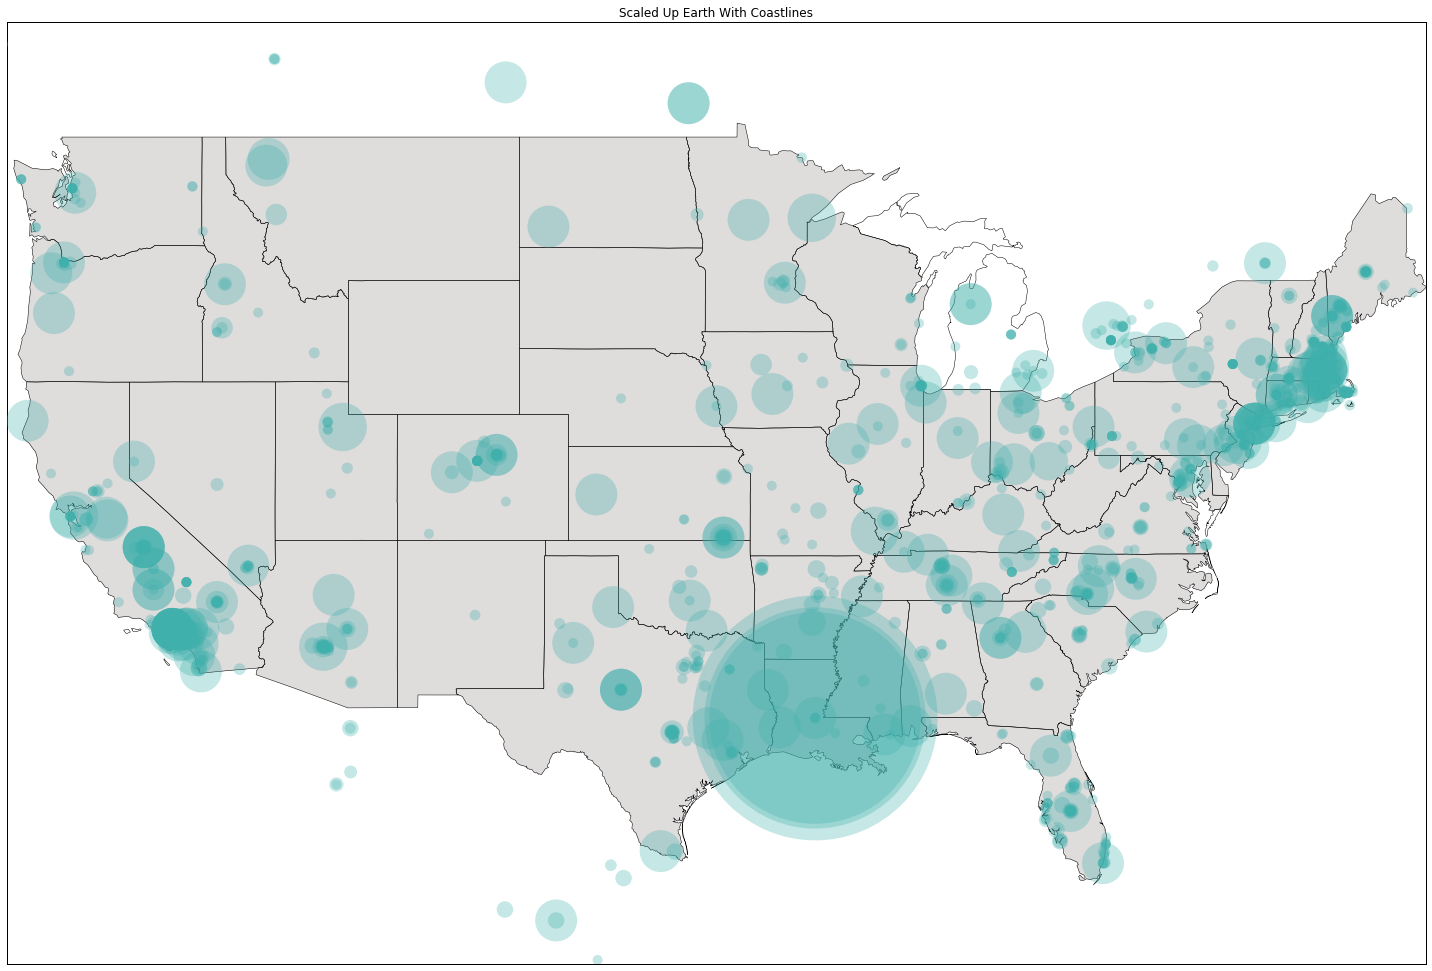

In [425]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
#ax.set_axis_bgcolor('#EDEDED')
#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(llcrnrlon=-125,llcrnrlat=22,urcrnrlon=-67,urcrnrlat=52,
            projection='merc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
m.readshapefile('states_21basic/states', name='states', drawbounds=True)
x, y = m(df_redsox['longitude'].tolist(), df_redsox['latitude'].tolist())
m.scatter(x, y, s=retweet_count, c='#3fb0ac', alpha=0.3, edgecolors='none', zorder=10)

#m.scatter(x, y, s=retweet_count, c=dates, cmap=my_cmap, alpha=0.5, edgecolors='white')

#m.drawstates(color='green')
#m.drawcoastlines(color='black')
#m.drawcoastlines(color='#32b181')

state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['STATE_ABBR'])

for state in state_names:
    seg = m.states[state_names.index(state)]
    poly = Polygon(seg, facecolor='#DFDCDC', edgecolor='none')
    ax.add_patch(poly)

plt.tight_layout()
#plt.colorbar()
plt.show()

## The 1000 Tweets Version ##

In [158]:
# Read in JSON data and store in pandas DataFrame.
tweets_filename = 'data/redsox/redsox_stream_08_14_1000.txt'
tweets_file = open(tweets_filename, "r")
tweets = []
locations = []
for line in tweets_file:
    try:
        # Read in each line of file, convert to JSON object. 
        tweet = json.loads(line.strip())
        # Make sure tweet has text content.
        if 'text' in tweet:
            tweets.append(tweet)
            locations.append(tweet['user']['location'])
    except:
        # Skip any non-JSON-formatted data that may have been captured.
        continue

In [159]:
df_redsox_all_1000 = pd.DataFrame(tweets)

In [160]:
df_redsox_all_1000['location'] = pd.Series(locations)

In [161]:
df_redsox_all_1000.shape

(1000, 32)

In [162]:
df_redsox_all_1000.head(3)

contributors coordinates                      created_at  \
0         None        None  Sun Aug 14 18:42:17 +0000 2016   
1         None        None  Sun Aug 14 18:42:18 +0000 2016   
2         None        None  Sun Aug 14 18:42:21 +0000 2016   

                                            entities  \
0  {'hashtags': [], 'user_mentions': [{'id': 4091...   
1  {'hashtags': [], 'user_mentions': [{'id': 5003...   
2  {'hashtags': [], 'user_mentions': [{'id': 1580...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 764887825917603842, 'expande...               0   
1                                                NaN               0   
2                                                NaN               0   

  favorited filter_level   geo                  id     ...      \
0     False          low  None  764894933325152256     ...       
1     False          low  None  764894934461579264     ...       
2     False          low  None  764894948227485696     ...       

  quoted_status_id_str retweet_count  retweeted  \
0                  NaN             0      False   
1   764890649330155520             0      False   
2                  NaN             0      False   

                                    retweeted_status  \
0  {'id': 764887860977819652, 'in_reply_to_user_i...   
1  {'id': 764891402295619588, 'in_reply_to_user_i...   
2  {'id': 764894191763718145, 'in_reply_to_user_i...   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text   timestamp_ms truncated  \
0  RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...  1471200137822     False   
1  RT @ShtBallPlayrsDo: Shits insane https://t.co...  1471200138093     False   
2  RT @SmittyOnMLB: The Red Sox haven't won three...  1471200141375     False   

                                                user    location  
0  {'id': 123013418, 'profile_image_url_https': '...    Fishing   
1  {'id': 388628991, 'profile_image_url_https': '...  RIP Aubrey  
2  {'id': 393097378, 'profile_image_url_https': '...  Boston, MA  

[3 rows x 32 columns]

In [163]:
df_redsox_1000 = df_redsox_all_1000[['text', 'created_at', 'location']]

In [164]:
df_redsox_1000.head(100)

text  \
0   RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...   
1   RT @ShtBallPlayrsDo: Shits insane https://t.co...   
2   RT @SmittyOnMLB: The Red Sox haven't won three...   
3   RT @RedSox: The #RedSox 2nd inning: \n7Ô∏è‚É£ runs...   
4   RT @RedSox: And that's how you start a game! üí•...   
5   @RedSox @JackieBradleyJr Party Time @LLBean  #...   
6   RedSox: .mookiebetts was just getting started ...   
7   RT @RedSox: The #RedSox 2nd inning: \n7Ô∏è‚É£ runs...   
8   RT @RedSox: 1Ô∏è‚É£ Hill single \n2Ô∏è‚É£ @sandyleon41...   
9   RT @NOTMLBTonight: After getting pulled in the...   
10  RT @NOTMLBTonight: After getting pulled in the...   
11  RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...   
12                  Redsox F5 ML looking so good.üí∞üí∞üí∞üí∞   
13  RT @RedSox: .@mookiebetts was just getting sta...   
14  RT @SPORTalkRedSox: #RedSox EXPLODE üî•üî•üî• in the...   
15  @PaulSpratt @StubHub @RedSox sucks you can't s...   
16  Farrell helping Red Sox combat difficult stret...   
17  Red Sox bat index ‚Äú@RedSox: üî•üî•üî• https://t.co/J...   
18  RT @RedSox: .@mookiebetts was just getting sta...   
19  Play the Immigrant Song by Led Zeppelin the 6t...   
20                      Red Sox are killin it today üëå   
21  RT @NOTMLBTonight: After getting pulled in the...   
22  RT @RedSox: Welcome to the party @JackieBradle...   
23  RT @RedSox: The #RedSox 2nd inning: \n7Ô∏è‚É£ runs...   
24  RT @RedSox: .@mookiebetts was just getting sta...   
25  RT @NOTMLBTonight: After getting pulled in the...   
26                          Red Sox kicking ass right   
27  #USA #Deals #ebay #5650 Steiner MLB Boston Red...   
28  Reigning AL Player Of The Month.... picks up w...   
29  RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...   
..                                                ...   
70  RT @palmieri1726: Sun is out @RedSox are winni...   
71  RT @SmittyOnMLB: The Red Sox haven't won three...   
72  RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...   
73  RT @BNightengale: The #RedSox will be playing ...   
74  RT @AdamMKaufman: Mookie Betts has 2 homers, J...   
75  RT @NOTMLBTonight: After getting pulled in the...   
76  RT @realOBF: Mookie Betts on pace for 9 HRs to...   
77  RT @NOTMLBTonight: After getting pulled in the...   
78  #Diamondbacks Jake Lamb reaches on error charg...   
79  RT @RedSox: And that's how you start a game! üí•...   
80      I love when the @RedSox play like the Red Sox   
81  RT @ShtBallPlayrsDo: Shits insane https://t.co...   
82    watching Arizona Diamondbacks vs Boston Red Sox   
83  RT @NOTMLBTonight: After getting pulled in the...   
84  RT @WalkOffBalkPod: Betts' AL ranks:\n\n152 Hi...   
85  What a great Red Sox game... to melt to death....   
86  #RedSox are 17-6 in Rick Porcello's starts thi...   
87  The #Redsox pitching staff is finally getting ...   
88  RT @domtopdad: 18YO SON PETE IS FUCKED. IN HIS...   
89  RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...   
90  RT @ShtBallPlayrsDo: Ew the Red Sox are destro...   
91  RT @NOTMLBTonight: After getting pulled in the...   
92  RT @RedSox: GET SOME @MOOKIEBETTS!!! üí•\n\n2nd ...   
93  Can NESN just show baseball? All this BS durin...   
94  Betts' two-run moonshot #RedSox  https://t.co/...   
95  RT @NOTMLBTonight: After getting pulled in the...   
96  Boston Red Sox going back to the basics this s...   
97  #ebay #USA #Deals #1811 Steiner MLB Boston Red...   
98    watching Arizona Diamondbacks vs Boston Red Sox   
99  Lets just take a moment to thank the person ch...   

                        created_at                          location  
0   Sun Aug 14 18:42:17 +0000 2016                          Fishing   
1   Sun Aug 14 18:42:18 +0000 2016                        RIP Aubrey  
2   Sun Aug 14 18:42:21 +0000 2016                        Boston, MA  
3   Sun Aug 14 18:42:21 +0000 2016                              None  
4   Sun Aug 14 18:42:26 +0000 2016                              None  
5   Sun A

In [105]:
# Takes a very long time to run. Other libraries quicker?
lats = []
longs = []
for location in df_redsox_1000['location']:
    g = geocoder.google(location)
    if g.latlng != []:
        lats.append(g.latlng[0])
        longs.append(g.latlng[1])
    else:
        lats.append(np.nan)
        longs.append(np.nan)

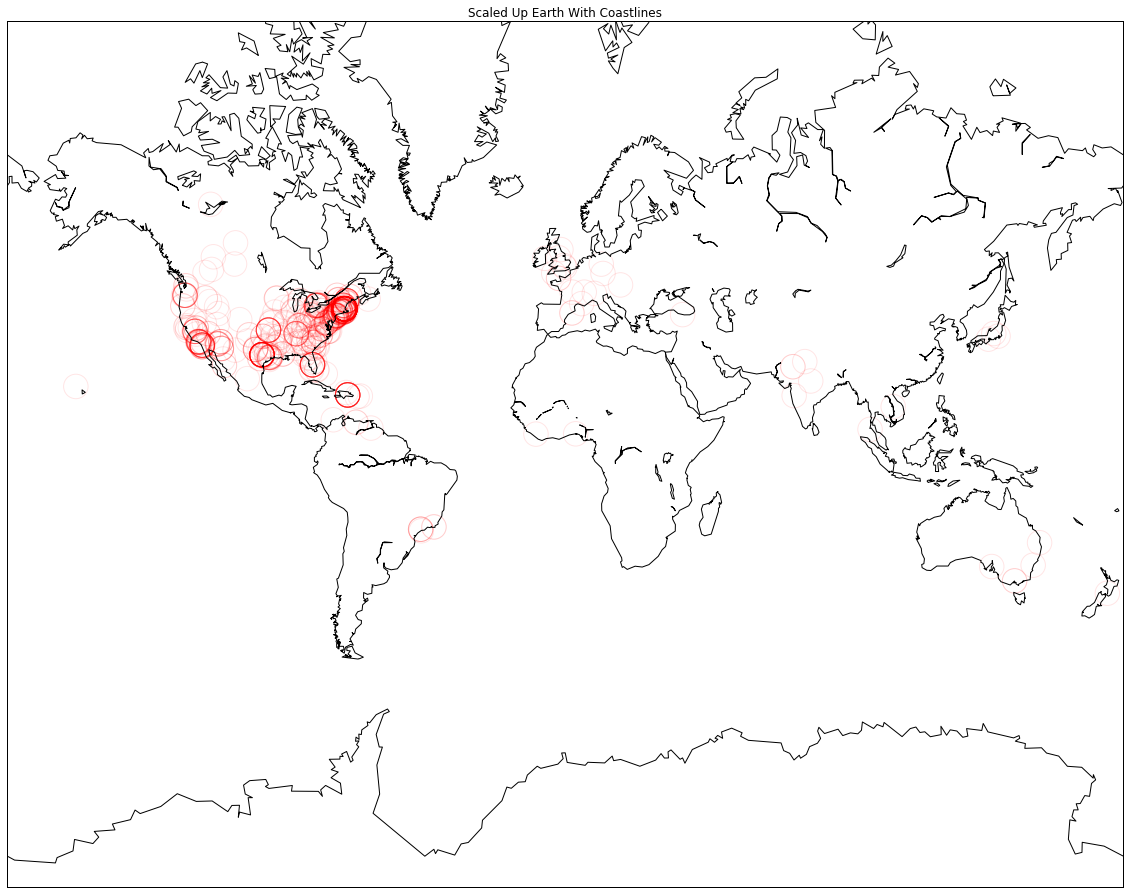

In [143]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longs, lats)
#m.scatter(x, y, s=600, alpha=0.1)
m.scatter(x, y, s=600, alpha=0.1, facecolors='none', edgecolors='r')
m.drawcoastlines()
plt.show()

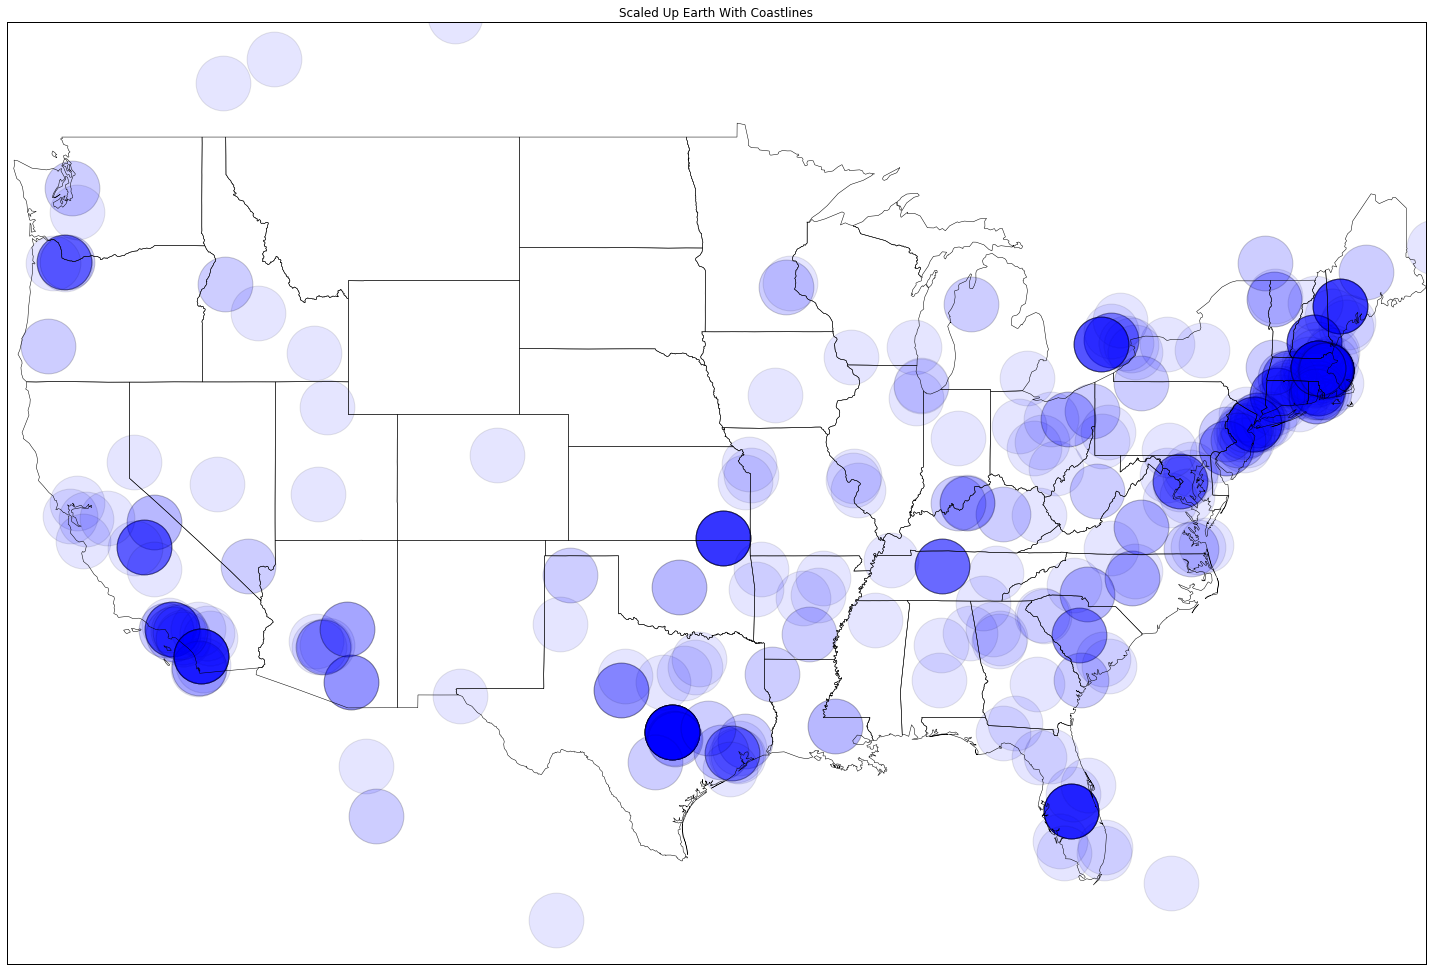

In [136]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(llcrnrlon=-125,llcrnrlat=22,urcrnrlon=-67,urcrnrlat=52,
            projection='merc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
m.readshapefile('states_21basic/states', name='states', drawbounds=True)
x, y = m(longs, lats)
m.scatter(x, y, s=3000, alpha=0.1)
#m.drawcoastlines(color='#c1e7d9')
#m.drawcoastlines(color='#32b181')
plt.tight_layout()
plt.show()